In [143]:
pip install tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
import string

import numpy as np
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from tokenizer import tokenizer as tk

#Lectura de los Datos.

In [145]:
df = pd.read_csv('./MovieReviewzs_num.csv')
print(df.shape)


(5000, 3)


In [146]:
df.head()

,Unnamed: 0,review_es,sentimiento
0,0,si está buscando una película de guerra típica esta no es así por lo que una nota a todos los aficionados a la guerra de ansiancia de carnajería de testosterona no se molesten aunque la película se trata de personajes rusos en la segunda guerra mundial no espere ver a ningún nazis cañones sangre sangre etc no es una película sobre las personas que causan una guerra o que luchan contra una guerra es una película sobre las personas ordinarias que le ocurren la guerra y las elecciones que hacen para tratar con ella cinematografía escritura todos los s perfectos aquí sin duda lo apreciarás si eres ruso como yo pero incluso si no probablemente lo ames si no habla ruso busque la versión dvd del dvd de ruscico russian cinema cinema tiene subtítulos en unos idiomas diferentes pero el doblaje inglés en este que diría es igual de bueno por supuesto no es tan bueno como la pista rusa original algunas cosas se pierden en la traducción sino tan buenas como los subtítulos en inglés así que vaya a revisarlo especialmente si está estudiando una película en cualquier aspecto,positivo
1,1,supongo que algunos directores de películas de lujo estaban sentados buscando su abrigo grappa aramangac o jugo de selva alguna noche en los años durante los cannes u otro festival de cine y uno dijo oye chicos hagamos una película donde cada uno de nosotros cree un segmento alrededor una clase mundial aria welllll tipo de tipo de trabajo claramente alguien fue lo suficientemente inteligente como para seleccionar algunas de las mejores grabaciones de las arias elegidas por ejemplo nessun dorma de bjoreling así que si estuvieras ciego y mintiendo en el piso simplemente escuchando el dvd obtuviste más que el valor de tu dinero no todos los directores lo sucedieron pero más lo hicieron lo que no y la película parece mejorar con cada visión a lo largo de los años mi favorito es el dúo de amor inquietantemente hermoso de die tod statd está bien un joven desnudo elizabeth hurley es ojos pero su marido cantó a ella el fantasma de su esposa es increíblemente hermoso con la música del amor segundo solo para gia nella notte densa de otello y desdemona en todo el repertorio operístico podría haber sido mejor el flick seguro lo que no podría haber sido pero vale la pena una visión especialmente de un estado de ánimo hiper romántico,positivo
2,2,es difícil contarle más sobre esta película sin estropearla lo disfruté porque no esperaba lo que estaba viendo sino un drama sexual ordinario así que es un thriller de pscyho sexual en el que nada es lo que parece cuenta con emmanuelle seigner sin extraño al género y a la desnudez en la que su esposo polanski la había dirigido y un rendimiento espeluznante dije espeluznante sí espeluznante de toreton el actor de bernard tavernier parece que un pascal bruckner se encuentra con roman polanski mejor que la luna amarga como un chabrol que se fue por extravisos o thriller de clouzot he visto a alguien que menciona les diaboliques pero más cerca de georges franju s les yeux sans visage ojos sin cara lapadrino del dr phibes y más una gema solo me temo que lo hicieran en un remake de hollywood como lo hicieron con nighwatch y la desaparición,positivo
3,3,la película comienza muy lentamente con el estilo de vida de wallace napalm un asistente en una estación de entrega de fotografía su esposa ha sido restringida a su casa con un brazalete de tobillo como resultado de una oración para el incendio wallace es miembro del departamento de bomberos voluntarios y toma en serio incendio en serio observamos el procedimiento de vida bastante aburrida de wallace de repente llega algo nuevo y jarring un carnaval viajero llega a la ciudad una de sus estrellas es wilder napalm el hermano de wallace es un payaso pero tiene un talento especial sobre wallace ambos son pirocinadores ni pirótica personas capaces de iniciar incendios a través de la energía mental wallace mantiene su secreto de poderes wilder le permite co

In [147]:
df = df.rename({'Unnamed: 0': 'id'},axis=1)

df.head()

,id,review_es,sentimiento
0,0,si está buscando una película de guerra típica esta no es así por lo que una nota a todos los aficionados a la guerra de ansiancia de carnajería de testosterona no se molesten aunque la película se trata de personajes rusos en la segunda guerra mundial no espere ver a ningún nazis cañones sangre sangre etc no es una película sobre las personas que causan una guerra o que luchan contra una guerra es una película sobre las personas ordinarias que le ocurren la guerra y las elecciones que hacen para tratar con ella cinematografía escritura todos los s perfectos aquí sin duda lo apreciarás si eres ruso como yo pero incluso si no probablemente lo ames si no habla ruso busque la versión dvd del dvd de ruscico russian cinema cinema tiene subtítulos en unos idiomas diferentes pero el doblaje inglés en este que diría es igual de bueno por supuesto no es tan bueno como la pista rusa original algunas cosas se pierden en la traducción sino tan buenas como los subtítulos en inglés así que vaya a revisarlo especialmente si está estudiando una película en cualquier aspecto,positivo
1,1,supongo que algunos directores de películas de lujo estaban sentados buscando su abrigo grappa aramangac o jugo de selva alguna noche en los años durante los cannes u otro festival de cine y uno dijo oye chicos hagamos una película donde cada uno de nosotros cree un segmento alrededor una clase mundial aria welllll tipo de tipo de trabajo claramente alguien fue lo suficientemente inteligente como para seleccionar algunas de las mejores grabaciones de las arias elegidas por ejemplo nessun dorma de bjoreling así que si estuvieras ciego y mintiendo en el piso simplemente escuchando el dvd obtuviste más que el valor de tu dinero no todos los directores lo sucedieron pero más lo hicieron lo que no y la película parece mejorar con cada visión a lo largo de los años mi favorito es el dúo de amor inquietantemente hermoso de die tod statd está bien un joven desnudo elizabeth hurley es ojos pero su marido cantó a ella el fantasma de su esposa es increíblemente hermoso con la música del amor segundo solo para gia nella notte densa de otello y desdemona en todo el repertorio operístico podría haber sido mejor el flick seguro lo que no podría haber sido pero vale la pena una visión especialmente de un estado de ánimo hiper romántico,positivo
2,2,es difícil contarle más sobre esta película sin estropearla lo disfruté porque no esperaba lo que estaba viendo sino un drama sexual ordinario así que es un thriller de pscyho sexual en el que nada es lo que parece cuenta con emmanuelle seigner sin extraño al género y a la desnudez en la que su esposo polanski la había dirigido y un rendimiento espeluznante dije espeluznante sí espeluznante de toreton el actor de bernard tavernier parece que un pascal bruckner se encuentra con roman polanski mejor que la luna amarga como un chabrol que se fue por extravisos o thriller de clouzot he visto a alguien que menciona les diaboliques pero más cerca de georges franju s les yeux sans visage ojos sin cara lapadrino del dr phibes y más una gema solo me temo que lo hicieran en un remake de hollywood como lo hicieron con nighwatch y la desaparición,positivo
3,3,la película comienza muy lentamente con el estilo de vida de wallace napalm un asistente en una estación de entrega de fotografía su esposa ha sido restringida a su casa con un brazalete de tobillo como resultado de una oración para el incendio wallace es miembro del departamento de bomberos voluntarios y toma en serio incendio en serio observamos el procedimiento de vida bastante aburrida de wallace de repente llega algo nuevo y jarring un carnaval viajero llega a la ciudad una de sus estrellas es wilder napalm el hermano de wallace es un payaso pero tiene un talento especial sobre wallace ambos son pirocinadores ni pirótica personas capaces de iniciar incendios a través de la energía mental wallace mantiene su secreto de poderes wilder le permite conocer a 

In [148]:
df['sentimiento'].value_counts(dropna = False, normalize = True)

positivo    0.5
negativo    0.5
Name: sentimiento, dtype: float64

In [149]:
pd.set_option('display.max_colwidth', None)

In [150]:
# Descargando las stopwords
nltk.download('stopwords')
sp_stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [151]:
spanish_stopwords = stopwords.words('spanish')

In [152]:
# Función para tokenizar los comments
def tokenizer(text):
     # Replace all non-alphanumeric characters with whitespace
    text = re.sub(r'[^\w\s]', ' ', text)

    # Convert all text to lowercase
    text = text.lower()

    # Split text into tokens
    tokens = text.split()

    return tokens

In [153]:
comments_labeled_df = df.loc[df['sentimiento'].notnull()]

In [154]:
# comments a ser usados para entrenar y evaluar el modelo
comments_labeled_df.shape

(5000, 3)

In [155]:
#Working only with positivo and negativo
comments_labeled_df = comments_labeled_df.loc[comments_labeled_df['sentimiento'].isin(['positivo', 'negativo'])]

In [156]:
comments_labeled_df['sentimiento'].value_counts(dropna = False, normalize = True)

positivo    0.5
negativo    0.5
Name: sentimiento, dtype: float64

In [157]:
comments_labeled_df['sentimiento'].value_counts(dropna = False, normalize = True)

positivo    0.5
negativo    0.5
Name: sentimiento, dtype: float64

In [158]:
comments_labeled_df.head()


,id,review_es,sentimiento
0,0,si está buscando una película de guerra típica esta no es así por lo que una nota a todos los aficionados a la guerra de ansiancia de carnajería de testosterona no se molesten aunque la película se trata de personajes rusos en la segunda guerra mundial no espere ver a ningún nazis cañones sangre sangre etc no es una película sobre las personas que causan una guerra o que luchan contra una guerra es una película sobre las personas ordinarias que le ocurren la guerra y las elecciones que hacen para tratar con ella cinematografía escritura todos los s perfectos aquí sin duda lo apreciarás si eres ruso como yo pero incluso si no probablemente lo ames si no habla ruso busque la versión dvd del dvd de ruscico russian cinema cinema tiene subtítulos en unos idiomas diferentes pero el doblaje inglés en este que diría es igual de bueno por supuesto no es tan bueno como la pista rusa original algunas cosas se pierden en la traducción sino tan buenas como los subtítulos en inglés así que vaya a revisarlo especialmente si está estudiando una película en cualquier aspecto,positivo
1,1,supongo que algunos directores de películas de lujo estaban sentados buscando su abrigo grappa aramangac o jugo de selva alguna noche en los años durante los cannes u otro festival de cine y uno dijo oye chicos hagamos una película donde cada uno de nosotros cree un segmento alrededor una clase mundial aria welllll tipo de tipo de trabajo claramente alguien fue lo suficientemente inteligente como para seleccionar algunas de las mejores grabaciones de las arias elegidas por ejemplo nessun dorma de bjoreling así que si estuvieras ciego y mintiendo en el piso simplemente escuchando el dvd obtuviste más que el valor de tu dinero no todos los directores lo sucedieron pero más lo hicieron lo que no y la película parece mejorar con cada visión a lo largo de los años mi favorito es el dúo de amor inquietantemente hermoso de die tod statd está bien un joven desnudo elizabeth hurley es ojos pero su marido cantó a ella el fantasma de su esposa es increíblemente hermoso con la música del amor segundo solo para gia nella notte densa de otello y desdemona en todo el repertorio operístico podría haber sido mejor el flick seguro lo que no podría haber sido pero vale la pena una visión especialmente de un estado de ánimo hiper romántico,positivo
2,2,es difícil contarle más sobre esta película sin estropearla lo disfruté porque no esperaba lo que estaba viendo sino un drama sexual ordinario así que es un thriller de pscyho sexual en el que nada es lo que parece cuenta con emmanuelle seigner sin extraño al género y a la desnudez en la que su esposo polanski la había dirigido y un rendimiento espeluznante dije espeluznante sí espeluznante de toreton el actor de bernard tavernier parece que un pascal bruckner se encuentra con roman polanski mejor que la luna amarga como un chabrol que se fue por extravisos o thriller de clouzot he visto a alguien que menciona les diaboliques pero más cerca de georges franju s les yeux sans visage ojos sin cara lapadrino del dr phibes y más una gema solo me temo que lo hicieran en un remake de hollywood como lo hicieron con nighwatch y la desaparición,positivo
3,3,la película comienza muy lentamente con el estilo de vida de wallace napalm un asistente en una estación de entrega de fotografía su esposa ha sido restringida a su casa con un brazalete de tobillo como resultado de una oración para el incendio wallace es miembro del departamento de bomberos voluntarios y toma en serio incendio en serio observamos el procedimiento de vida bastante aburrida de wallace de repente llega algo nuevo y jarring un carnaval viajero llega a la ciudad una de sus estrellas es wilder napalm el hermano de wallace es un payaso pero tiene un talento especial sobre wallace ambos son pirocinadores ni pirótica personas capaces de iniciar incendios a través de la energía mental wallace mantiene su secreto de poderes wilder le permite conocer a 

### Diviendo los comments etiquetados en los conjuntos de entrenamiento y prueba

In [159]:
# Cuando se cuenta con muy pocos datos etiquetados, por lo general se debe disponer de una menor cantidad de datos para evaluación
X_train, X_test, y_train, y_test = train_test_split(comments_labeled_df['review_es'], comments_labeled_df['sentimiento'], test_size = 0.2, random_state = 1)

In [160]:
X_train.shape

(4000,)

In [161]:
pd.Series(y_train).value_counts(normalize = True)

negativo    0.5015
positivo    0.4985
Name: sentimiento, dtype: float64

In [162]:
X_test.shape

(1000,)

In [163]:
pd.Series(y_test).value_counts(normalize = True)

positivo    0.506
negativo    0.494
Name: sentimiento, dtype: float64

#Vectorizar Comentarios

In [164]:
X_train.head()

1233                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [165]:
tfidf = TfidfVectorizer(analyzer = 'word',tokenizer = tokenizer, stop_words = spanish_stopwords, lowercase = True)

In [166]:
X_tfidf = tfidf.fit_transform(X_train.values.astype('U'))

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [167]:
X_tfidf

<4000x50531 sparse matrix of type '<class 'numpy.float64'>'
	with 410002 stored elements in Compressed Sparse Row format>

In [168]:
len(tfidf.vocabulary_)

50531

### Entrenando y evaluando un modelo usado TF-IDF

In [169]:
randomForest_model = RandomForestClassifier(random_state = 3, n_estimators = 500)

In [170]:
randomForest_model.fit(X_tfidf, y_train)

RandomForestClassifier(n_estimators=500, random_state=3)

<Axes: >

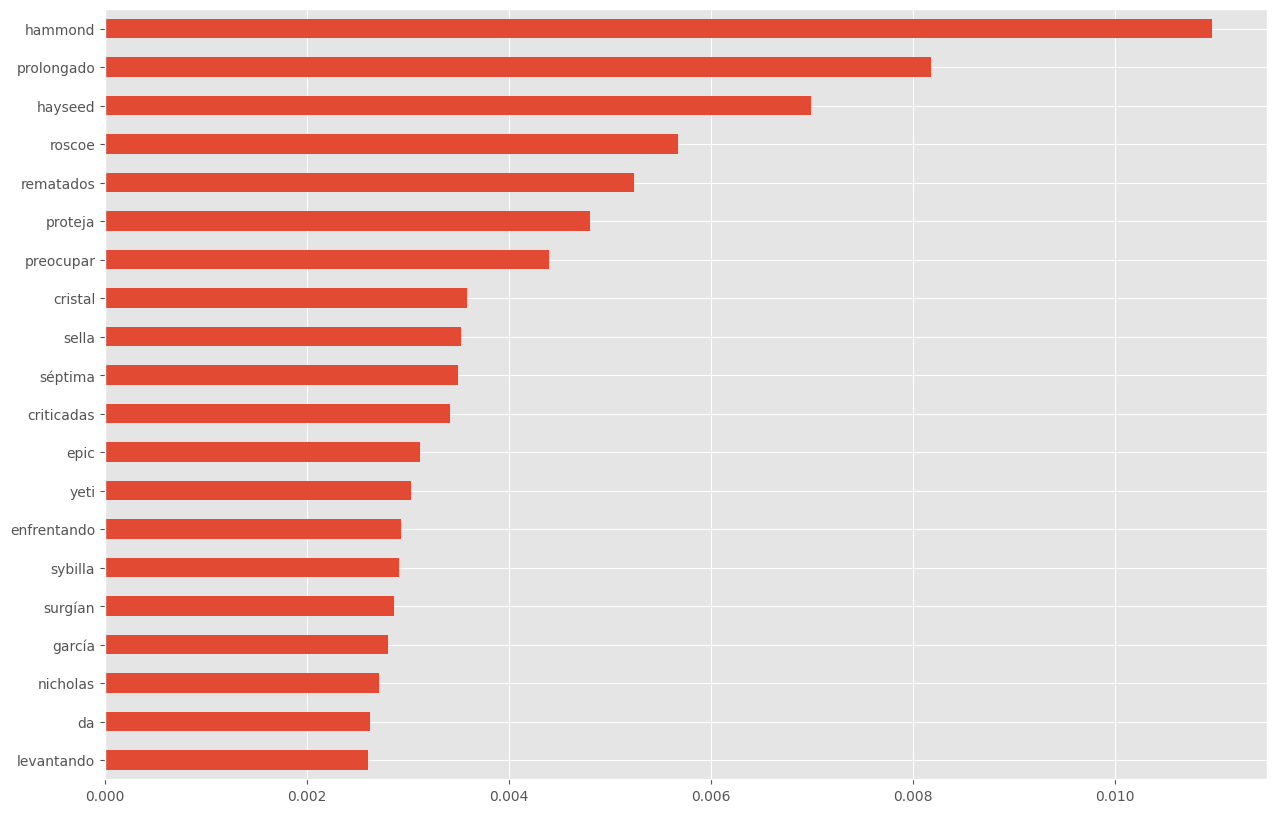

In [171]:
pd.Series(randomForest_model.feature_importances_, index = tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize = (15, 10))

In [172]:
randomForest_estimators = randomForest_model.estimators_
print('Number of trees:', len(randomForest_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in randomForest_estimators]))

Number of trees: 500
Trees depth (mean): 166.67


In [173]:
y_train_randomForest_predict = randomForest_model.predict(X_tfidf)
y_test_randomForest_predict = randomForest_model.predict(tfidf.transform(X_test.values.astype('U')))

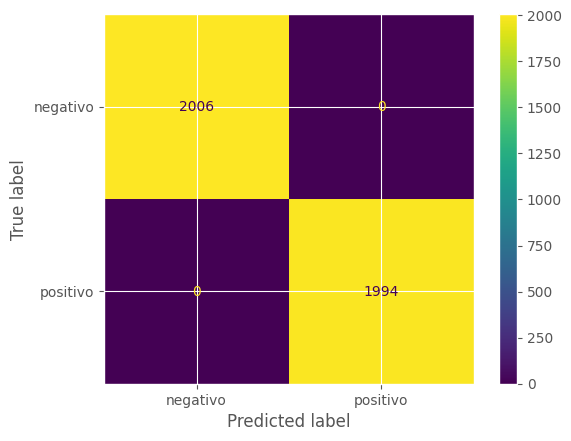

In [174]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_randomForest_predict)

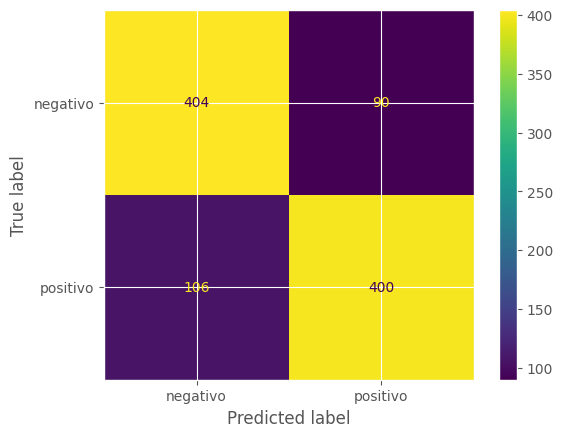

In [177]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_randomForest_predict)

In [175]:
if len(randomForest_model.classes_) == 2:
    print('Precision:', precision_score(y_train, y_train_randomForest_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_train, y_train_randomForest_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_train, y_train_randomForest_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_train, y_train_randomForest_predict, average = None))
    print('Recall:', recall_score(y_train, y_train_randomForest_predict, average = None))
    print('F1:', f1_score(y_train, y_train_randomForest_predict, average = None))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [176]:
if len(randomForest_model.classes_) == 2:
    print('Precision:', precision_score(y_test, y_test_randomForest_predict, pos_label = 'positivo'))
    print('Recall:', recall_score(y_test, y_test_randomForest_predict, pos_label = 'positivo'))
    print('F1:', f1_score(y_test, y_test_randomForest_predict, pos_label = 'positivo'))
else:
    # Para casos no binarios, es común calcular las métricas para cada clase
    print('Precision:', precision_score(y_test, y_test_randomForest_predict, average = None))
    print('Recall:', recall_score(y_test, y_test_randomForest_predict, average = None))
    print('F1:', f1_score(y_test, y_test_randomForest_predict, average = None))

Precision: 0.8163265306122449
Recall: 0.7905138339920948
F1: 0.8032128514056225
